# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My datasets:
- Conflict in Mexico: https://acleddata.com/data-export-tool/ (Armed Conflict Location & Event Data Project, January 1 2018 - December 31 2023, accessed October 18, 2024)
- Forest over loss: https://www.globalforestwatch.org/dashboards/country/MEX/ (Global Forest Watch, 2001-2023, access October 11 2024)

Import the necessary libraries and create your dataframe(s).

In [138]:
import pandas as pd
# Load the ACLED conflict csv file into a dataframe:
conflict_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/eda-checkpoint/ACLED_Mexico Conflict Data.csv')

# Load the 2 GFW csv files into separate dataframes:
driver_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/eda-checkpoint/GFW_Mexico_treecover_loss__ha.csv')
admin_df = pd.read_csv('/Users/audreythill/Desktop/LaunchCode/Python/Final Project/eda-checkpoint/GFW_Mexico_loss by region.csv')

# Join the two forest dataframes on their columns with the year with an 'outer' merge (on year) to retain the data that is not the same 
# (e.g both have forest loss columns but the unit of analysis is different (admin vs driver)). Add a suffix on the shared columns to keep them distinguishable
forest_df = pd.merge(driver_df, admin_df, on='umd_tree_cover_loss__year', how='outer', suffixes=('_driver', '_admin'))

# Rename several columns to make them easier reference in EDA and to match the conflict_df: rename the 'umd_tree_cover_loss__year' to 'year'
# and 'adm' to 'admin1' to match the corresponding columns in conflict_df.
forest_renamed = forest_df.rename(columns={'umd_tree_cover_loss__year': 'year', 'adm1': 'admin1', 'tsc_tree_cover_loss_drivers__driver': 'driver', 'umd_tree_cover_loss__ha_driver': 'forest_loss_by_driver', 'umd_tree_cover_loss__ha_admin': 'forest_loss_by_admin'})

# Merge the conflict and forest dataframes on 'year' with an outer join to retain all columns.
merged_df = pd.merge(forest_renamed, conflict_df, on=['year','admin1'], how='outer')
merged_df.head()

,driver,year,forest_loss_by_driver,gfw_gross_emissions_co2e_all_gases__Mg_driver,iso_x,admin1,forest_loss_by_admin,gfw_gross_emissions_co2e_all_gases__Mg_admin,event_id_cnty,event_date,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,Commodity driven deforestation,2001,30009.328237,8.492504e+06,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Urbanization,2001,865.735246,1.912652e+05,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unknown,2001,2526.940860,4.566551e+05,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wildfire,2001,1826.876308,3.864465e+05,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forestry,2001,6484.983381,1.556750e+06,MEX,Aguascalientes,3.792795,308.00233,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [139]:
# Identify how many nulls there are in the df:
print(merged_df.isnull().sum())

# I can see that columns with nulls are mostly related to the fact that I merged two datasets with columns that they do not both share
# (example: there are 2723 null values for the columns that are only from the GFW dataset and 3564 values for columns only from the ACLED dataset)
# These are in columns designated for observations that were not relevant to the particular conflict event
# (for example: admin 3, tags, civilian_targeting, assoc_actor_1, assoc_actor_2, all of which are not necessary for my analysis).


driver                                            2723
year                                                 0
forest_loss_by_driver                             2723
gfw_gross_emissions_co2e_all_gases__Mg_driver     2723
iso_x                                             2723
admin1                                               0
forest_loss_by_admin                              2723
gfw_gross_emissions_co2e_all_gases__Mg_admin      2723
event_id_cnty                                     3564
event_date                                        3564
time_precision                                    3564
disorder_type                                     3564
event_type                                        3564
sub_event_type                                    3564
actor1                                            3564
assoc_actor_1                                    37817
inter1                                            3564
actor2                                            3728
assoc_acto

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [140]:
# Find the max and minimum values for forest loss by admin and driver (and round 2 decimal places):
max_forest_loss_by_driver = merged_df['forest_loss_by_driver'].max().round(2)
print(f"max forest loss by driver: {max_forest_loss_by_driver} hectares")

min_forest_loss_by_driver = merged_df['forest_loss_by_driver'].min().round(2)
print(f"min forest loss by driver: {min_forest_loss_by_driver} hectares")

max_forest_loss_by_admin = merged_df['forest_loss_by_admin'].max().round(2)
print(f"max forest loss by admin: {max_forest_loss_by_admin} hectares")

min_forest_loss_by_admin = merged_df['forest_loss_by_admin'].min().round(2)
print(f"min forest loss by admin: {min_forest_loss_by_admin} hectares")

max forest loss by driver: 244467.94 hectares
min forest loss by driver: 183.03 hectares
max forest loss by admin: 80949.9 hectares
min forest loss by admin: 0.07 hectares


In [141]:
# Now I want to look at the 1st and 3rd quartiles and find the inner quartile range to get a better sense of the data spread.
# For forest loss by driver:
Q1_driver = merged_df['forest_loss_by_driver'].quantile(0.25).round(2)
Q3_driver = merged_df['forest_loss_by_driver'].quantile(0.75).round(2)
IQR_driver = Q3_driver - Q1_driver   # calculate the inter-quartile range
print(Q1_driver)  
print(Q3_driver)
print(IQR_driver)

#For forest loss by admin:
Q1_admin = merged_df['forest_loss_by_admin'].quantile(0.25).round(2)
Q3_admin = merged_df['forest_loss_by_admin'].quantile(0.75).round(2)
IQR_admin = Q3_admin - Q1_admin   # calculate the inter-quartile range
print(Q1_admin)  
print(Q3_admin)
print(IQR_admin)

# Notes: 

# It's interesting to see that the IQR for these two columns are not the same. But this is to be expected since they represent different units of analysis (admin vs. driver).
# The larger IQR for forest loss by driver suggests that there is more variability attributable to the different drivers of deforestation. 
# For example, Q3 is very high (59559.54 ha), meaning the data skews to the right. This suggests that while a significant portion of the data has relatively low forest loss
# (up to Q1, which is 1451.35), there some drivers that lead to extremely high forest loss. 
# Alternatively, the lower IQR indicates the data is more centralized around lower loss values. This suggests that forest loss by admin
# is less of a factor in forest loss. Although there is variability, 
# The Q1 value (247.95 ha) shows that many regions have low forest loss, while some admins have moderate/high loss (7038.26).


SyntaxError: invalid syntax (2752967493.py, line 20)

In [45]:
# # Now find the outliers by establishing boundaries based on adding or subtracting 1.5X the inter-quartile range (IQR)
# by driver:
lower_bound = Q1 - 1.5 * IQR_driver
upper_bound = Q3 + 1.5 * IQR_driver
outliers = merged_df[(merged_df['forest_loss_by_driver'] < lower_bound) | (merged_df['forest_loss_by_driver'] > upper_bound)]
print(outliers)
# I see the outliers for forest loss are heavily represented by ‘commodity driven deforestation’ and ‘shifting agriculture’ in the ‘driver’ column.
# Based on my visualizations in EDA, I know these are important outliers to include.

# by admin: 
lower_bound_a = Q1 - 1.5 * IQR_admin
upper_bound_a = Q3 + 1.5 * IQR_admin
outliers_a = merged_df[(merged_df['forest_loss_by_admin'] < lower_bound_a) | (merged_df['forest_loss_by_admin'] > upper_bound_a)]
print(outliers_a)
# Similarily, I see outliers corresponding with 'admin' locations that showed higher levels of deforestation in 
# my EDA visualizations. So I will not take actions to remove these.

                               driver  year  forest_loss_by_driver  \
18     Commodity driven deforestation  2001           30009.328237   
19                       Urbanization  2001             865.735246   
20                            Unknown  2001            2526.940860   
21                           Wildfire  2001            1826.876308   
22                           Forestry  2001            6484.983381   
...                               ...   ...                    ...   
36283                        Forestry  2023            7205.221491   
36284                        Forestry  2023            7205.221491   
36285                        Forestry  2023            7205.221491   
36286                        Forestry  2023            7205.221491   
36287                        Forestry  2023            7205.221491   

       gfw_gross_emissions_co2e_all_gases__Mg_driver iso_x        admin1  \
18                                      8.492504e+06   MEX      Campeche   
19     

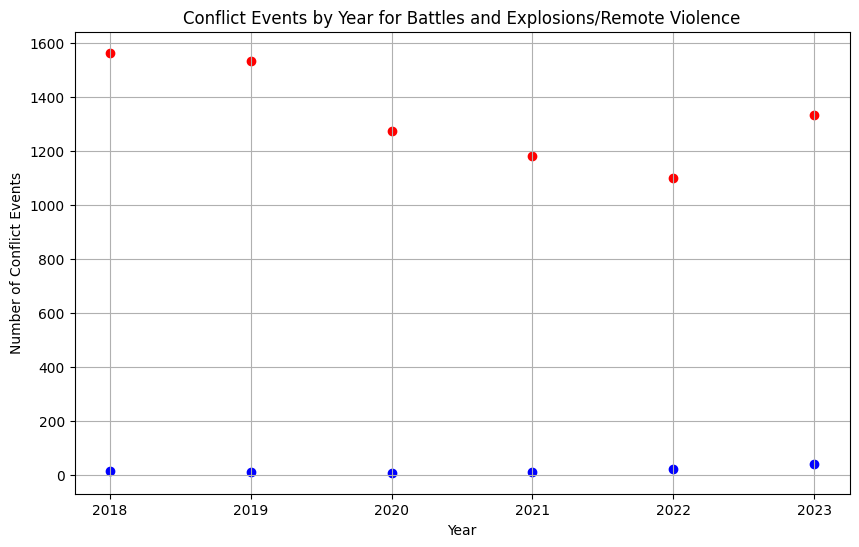

In [60]:
# For the conflict data, I want to visualize the events by time and event type ('Battles' and 'Explosions/Remote violence') on a scatter plot,
# with different color dots for the different event types.

# First, I need to first filter the data (because I have not yet dropped other event types).

battles_and_remoteviolence_df = merged_df[(merged_df['event_type'] == 'Battles') |   
    (merged_df['event_type'] == 'Explosions/Remote violence')]

# Group the filtered data by year and find the number of unique 'event_id_cnty' (the unit of analysis for the ACLED dataset)
grouped_data_filtered = battles_and_remoteviolence_df.groupby(['year', 'event_type'])['event_id_cnty'].nunique().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Plot battles with a unique color and label
battles_data = grouped_data_filtered[grouped_data_filtered['event_type'] == 'Battles']
plt.scatter(battles_data['year'], battles_data['event_id_cnty'], color='red', marker='o', label='Battles')

# Plot Explosions/Remote Violence with a unique color and label
explosions_data = grouped_data_filtered[grouped_data_filtered['event_type'] == 'Explosions/Remote violence']
plt.scatter(explosions_data['year'], explosions_data['event_id_cnty'], color='blue', marker='o', label='Explosions/Remote Violence')

# Now add my titles/labels:
plt.xlabel('Year')
plt.ylabel('Number of Conflict Events')
plt.title('Conflict Events by Year for Battles and Explosions/Remote Violence')


# When I made a scatter plot of conflict events by year and type, I saw that the general trend of events is driven by ‘battles’ and not ‘explosions/remote violence’. That is helpful to know for analysis later.
# The dots are pretty smooth, so no issues here with outliers.
plt.grid(True)

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [128]:
# There is quite a bit of unnecessary data. I want to drop some columns, so first I will print out the current column names.
print(merged_df.columns)

# The following columns are not relevant to my research scope so I will drop them:
#     - ACLED: 'inter1', 'inter2', 'interaction', 'civilian_targeting', 'iso_y', 'disorder_type', 'event_date', 'region', 'admin2', 'admin3', 'source', 'geo_precision', 'source_scale', 'country', 'location', 'notes', 'tags','timestamp’, 'time_precision'
#     - GFW: 'gfw_gross_emissions_co2e_all_gases__Mg_driver', 'iso_x', 'gfw_gross_emissions_co2e_all_gases__Mg_admin'

merged_df = merged_df.drop(columns=['inter1',
                                            'inter2',
                                            'interaction',
                                            'civilian_targeting',
                                            'iso_y',
                                            'disorder_type',
                                            'region',
                                            'admin2',
                                            'admin3',
                                            'source',
                                            'source_scale',
                                            'country',
                                            'location', 
                                            'notes',
                                            'event_date',
                                            'tags',
                                            'geo_precision',
                                            'timestamp',
                                            'time_precision',
                                            'gfw_gross_emissions_co2e_all_gases__Mg_driver',
                                            'iso_x',
                                            'gfw_gross_emissions_co2e_all_gases__Mg_admin'])
print(merged_df.columns)
# I did leave in a few columns (from ACLED conflict dataset) that are not necessary to my immediate project but that might be 
# interesting to look at later. E.g, actor names and the types of violence.




Index(['driver', 'year', 'forest loss by driver',
       'gfw_gross_emissions_co2e_all_gases__Mg_driver', 'iso_x', 'admin',
       'forest loss by admin', 'gfw_gross_emissions_co2e_all_gases__Mg_admin',
       'conflict event id', 'event_date', 'time_precision', 'disorder_type',
       'event type', 'subevent type', 'actor1', 'assoc_actor_1', 'inter1',
       'actor2', 'assoc_actor_2', 'inter2', 'interaction',
       'civilian_targeting', 'iso_y', 'region', 'country', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'tags', 'timestamp'],
      dtype='object')
Index(['driver', 'year', 'forest loss by driver', 'admin',
       'forest loss by admin', 'conflict event id', 'event type',
       'subevent type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2',
       'latitude', 'longitude', 'fatalities'],
      dtype='object')


In [132]:
# I need to drop forest data prior to 2015 because this is when GFW changed their methodology. Comparing old and new data, especially before/after 2015
# could result in inaccurate analysis.

after_2015_merged_df = merged_df[merged_df['year'] >= 2015]


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [133]:
# Based on what I found in EDA, I need to address spelling inconsistencies in admin names
# admin_names = merged_df['admin1'].unique()
# print(admin_names)

# I need to rename these locations to eliminate inconsistencies.
# - Michoacan de Ocampo instead of 'Michoac�n'
# - Estado de Mexico instead of Mexico or 'M�xico' 
# - Nuevo Leon instead of 'Nuevo Le�n'
# - Queretaro instead of 'Quer�taro'
# - San Luis Potosi instead of 'San Luis Potos�' 
# - Yucatan instead of 'Yucat�n' 
# - Ciudad de Mexico instead of 'Distrito Federal'
# - Coahuila de Zaragoza instead of 'Coahuila'
# - Veracruz instead of  'Veracruz de Ignacio de la Llave'

after_2015_merged_df = after_2015_merged_df.rename(columns={'admin1': 'admin'}) # rename this column since I will only be looking at 1 admin and dropping the others.
# Replace the admin names that I want to get rid of with the correct spelling
after_2015_merged_df['admin'].replace(
    to_replace={
        'Michoac�n': 'Michoacan de Ocampo', 
        'M�xico': 'Estado de Mexico', 
        'Quer�taro': 'Queretaro', 
        'San Luis Potos�': 'San Luis Potosi', 
        'Nuevo Le�n': 'Nuevo Leon',
        'Distrito Federal': 'Ciudad de Mexico',
        'Coahuila': 'Coahuila de Zaragoza', 
        'Veracruz de Ignacio de la Llave': 'Veracruz',
        'Mexico': 'Estado de Mexico',
        'Yucat�n': 'Yucatan'}, inplace=True) # make the changes to the dataframe
print(after_2015_merged_df['admin'].nunique())
print(after_2015_merged_df['admin'].unique())
# Mexico has 31 states and one federal district, so now this is accurate.


32
['Baja California' 'Campeche' 'Chiapas' 'Chihuahua' 'Coahuila de Zaragoza'
 'Colima' 'Ciudad de Mexico' 'Durango' 'Guanajuato' 'Guerrero' 'Hidalgo'
 'Jalisco' 'Michoacan de Ocampo' 'Morelos' 'Estado de Mexico' 'Nayarit'
 'Nuevo Leon' 'Oaxaca' 'Puebla' 'Queretaro' 'Quintana Roo'
 'San Luis Potosi' 'Sinaloa' 'Sonora' 'Tabasco' 'Tamaulipas' 'Tlaxcala'
 'Veracruz' 'Yucatan' 'Zacatecas' 'Aguascalientes' 'Baja California Sur']


/var/folders/zm/8zb36yy90n58sqvbn109rjyc0000gn/T/ipykernel_18897/431568137.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  after_2015_merged_df['admin'].replace(


In [134]:
# I will rename some columns to be more descriptive to better facilitate my analysis in Tableau:
after_2015_merged_df = after_2015_merged_df.rename(columns={
       'even_id_cnty': 'conflict event',
       'forest_loss_by_admin': 'forest loss by admin',
       'forest_loss_by_driver': 'forest loss by driver',
       'event_id_cnty': 'conflict event id',
       'event_type': 'event type',
       'sub_event_type': 'subevent type'       
       })
print(after_2015_merged_df.columns)


Index(['driver', 'year', 'forest loss by driver', 'admin',
       'forest loss by admin', 'conflict event id', 'event type',
       'subevent type', 'actor1', 'assoc_actor_1', 'actor2', 'assoc_actor_2',
       'latitude', 'longitude', 'fatalities'],
      dtype='object')


In [135]:
# Strip the admin names - although I already know from visual inspection that there should not be any.
cleaned_df = after_2015_merged_df['admin'].str.strip()

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?

Yes, but these were not due to errors on the part of the people who created the dataset. They mostly stemmed from combining two separate datasets that used different spelling conventions for Mexican states. Additionally, there were null values, but these were not missing due to error but rather because there was not relevant data for those particular rows/columns (e.g., if a conflict event did not involve an 'associated actor 2'). I also dropped columns that are not relevant to my analysis and renamed columns so they are more descriptive. As for irregular data, I identified that there are indeed outliers, but based on what I saw, these are exactly what I will be looking for in my analysis.

At first I thought I would drop the forest loss data that precedes January 2018 (when the conflict data starts), but then I realized I still may want to analyze general trends from those years. However, I did drop data prior to 2015 because this is when the GFW dataset creators changed their methodology.

2. Did the process of cleaning your data give you new insights into your dataset?

The process of identifying outliers in my forest loss data gave me some insights. For example, the IQR 
for 'forest loss by driver' was larger than 'forest loss by admin'. For 'driver', the 3rd quartile was quite high, meaning the data skewed significantly to the right -- this leads me to think that most drivers have little relationship to forest loss whereas a few drivers have a significant impact. On the other hand, the lower IQR for 'admin'-related forest loss suggests that the specific admin is less of a factor in teh forest loss.

3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

As described above, I will definitely need to drill into the relationship between admin and forest loss. Based on my calculations of IQR, it appears to be less of a factor compared to other 'drivers' of forest loss, but this does not mean there is not a statistical relationship. I will try to do a regression analysis in addition to other charts/graphs.

I will also be interested to use the latitute and longituede (provided by the ACLED conflict dataset) to make maps. Hopefully this works to create shading on individual states.
